<a href="https://colab.research.google.com/github/electrojam/Curso-de-Matematicas-para-Data-Science_Probabilidad/blob/main/Estimaci%C3%B3n_densidad_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np #operaciones con arreglos
import matplotlib.pyplot as plt
from numpy.random import normal #import generador de números random
from scipy.stats import norm

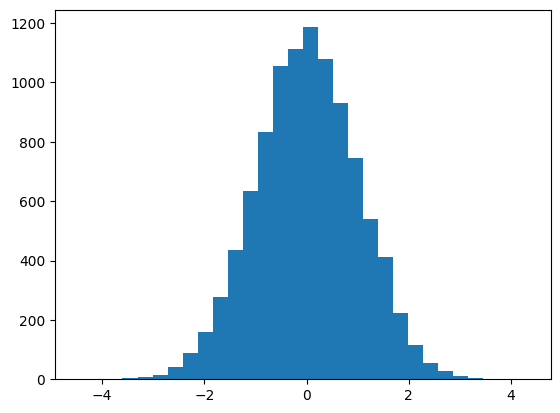

In [5]:
sample = normal(size = 10000) # Generador de datos aleatoriamente 10000
plt.hist(sample, bins = 30)
plt.show()


####Estimación Paramétrica

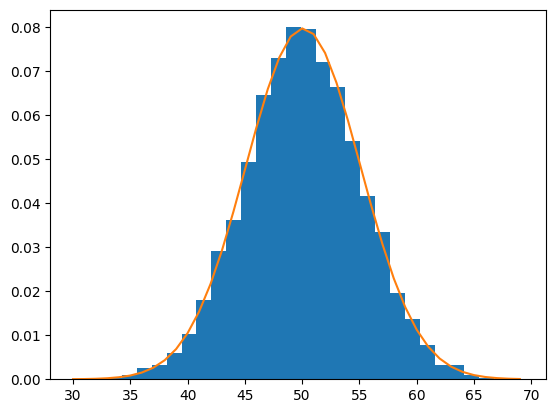

In [11]:
# Distribución gaussiana, datos deben seguir distri gaussians
# donde promedio es el promedio de datos y la dsivaición estandar es la de los datos
sample = normal(loc = 50, scale=5, size = 10000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilidades = [dist.pdf(value) for value in values]
plt.hist(sample, bins = 30, density = True)
plt.plot(values, probabilidades)
plt.show()


####Estimación no paramétrica

In [12]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

# Construimos una distribución bimodadl compuesta por dos distribuciones gaussianas sample 1 y sample 2

sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1)) #tecnisismo
model.fit(sample)


KernelDensity(bandwidth=2)

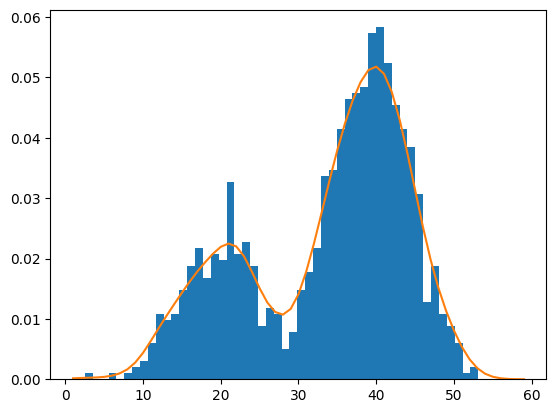

In [13]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) # probabilidad logarítmica
probabilities = np.exp(probabilities) # inversión de la probabilidad

plt.hist(sample, bins=50, density=True)
plt.plot(values, probabilities)
plt.show()
